In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt

# df of mape
df_raw = pd.read_csv(r"/workspaces/ml-for-forecasting/univariate/evaluations/mape.csv")
df = df_raw.copy(deep = True)
df = df.drop(columns='fname', axis=1)
df

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,0.026156,0.050425,0.040932,0.040462,0.021054,0.026168,0.026236,0.026847,0.062619
1,0.010487,0.009797,0.010481,0.005919,0.005833,0.005842,0.007084,0.007029,0.014732
2,0.080253,0.071223,0.292280,0.056838,0.060877,0.065756,0.054821,0.066450,0.186637
3,0.019157,0.022407,0.032320,0.019670,0.021735,0.018365,0.014966,0.015826,0.023622
4,0.165968,0.248332,0.368033,0.154292,0.177341,0.207405,0.100278,0.148183,0.242213
...,...,...,...,...,...,...,...,...,...
245,0.073681,0.082177,0.073674,0.107899,0.080244,0.087882,0.078133,0.078133,0.142365
246,0.029782,0.017622,0.029735,0.023589,0.035659,0.021877,0.024585,0.025510,0.063491
247,0.012889,0.010656,0.014875,0.010803,0.013057,0.011079,0.010718,0.010785,0.013238
248,0.027407,0.164028,0.027333,0.141311,0.137469,0.077713,0.026562,0.026562,0.062836


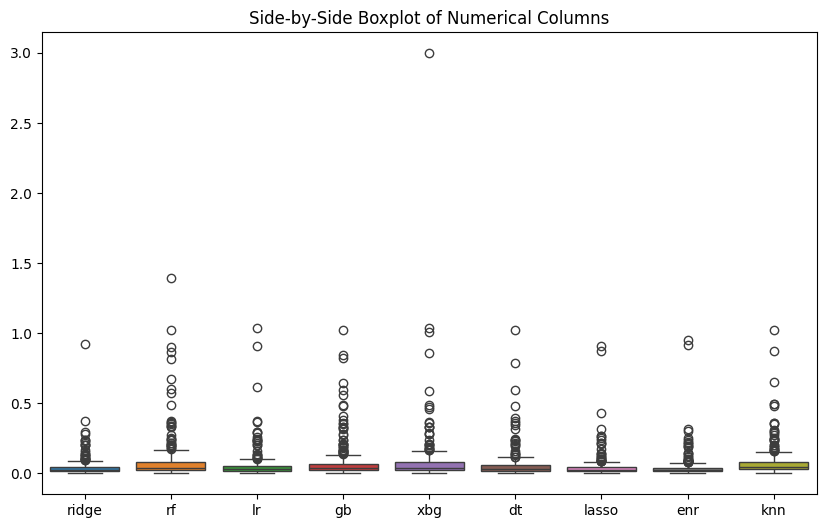

In [2]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [3]:
import pandas as pd


# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df)
df_clean


,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,0.026156,0.050425,0.040932,0.040462,0.021054,0.026168,0.026236,0.026847,0.062619
1,0.010487,0.009797,0.010481,0.005919,0.005833,0.005842,0.007084,0.007029,0.014732
3,0.019157,0.022407,0.032320,0.019670,0.021735,0.018365,0.014966,0.015826,0.023622
7,0.015273,0.032113,0.015268,0.035380,0.032990,0.016800,0.014384,0.014300,0.017406
8,0.017382,0.026939,0.017382,0.030043,0.031248,0.024387,0.017596,0.017596,0.038166
...,...,...,...,...,...,...,...,...,...
242,0.026145,0.024718,0.026145,0.025695,0.030735,0.021259,0.024208,0.024291,0.029045
243,0.014744,0.031181,0.014737,0.035406,0.030261,0.014787,0.013591,0.013801,0.015864
244,0.032994,0.049396,0.032995,0.049428,0.048284,0.044109,0.033243,0.033207,0.051734
246,0.029782,0.017622,0.029735,0.023589,0.035659,0.021877,0.024585,0.025510,0.063491


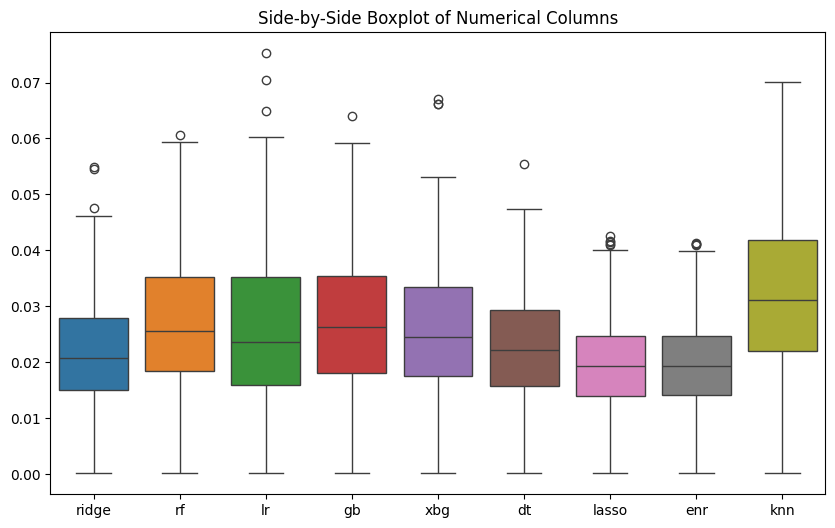

In [4]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [5]:
df_clean.mean()

ridge    0.022310
rf       0.027273
lr       0.026605
gb       0.027121
xbg      0.026390
dt       0.023377
lasso    0.020607
enr      0.020507
knn      0.032584
dtype: float64

In [6]:
len(df_clean)

154